In [1]:
#### import all the necessary python packages for this assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing 
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix       # for confusion matrix
from sklearn.metrics import classification_report  # to evaluate accuracy
import graphviz
from sklearn.tree import export_graphviz
from sklearn import model_selection                # for crosss validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Enable inline plotting
# %matplotlib inline
plt.style.use('ggplot')

### Load the data the into a Pandas dataframe  


In [3]:
fileName = r'../../data/adult-modified1.csv'
df = pd.read_csv(fileName, sep=',')
print(df.shape)
# the first top 5 records
df.head()

(9412, 8)


,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


<p>There are 9412 instances and 8 columns.</p>

In [4]:
# last five records
df.tail()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K
9411,39,Private,10,Single,White,Female,40,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9412 non-null   int64 
 1   workclass       9412 non-null   object
 2   education       9412 non-null   int64 
 3   marital-status  9412 non-null   object
 4   race            9412 non-null   object
 5   sex             9412 non-null   object
 6   hours-per-week  9412 non-null   int64 
 7   income          9412 non-null   object
dtypes: int64(3), object(5)
memory usage: 588.4+ KB


<p>we have 3 numeric attributes and 5 categorical attributes. </p>
<p>The five categorical attributes  could be transformed into the right categorical data type; convert from object into category.</p>

#### Next, we use the Pandas "get_dummies" function to create dummy variables for the categorical attributes data set is fully numeric (standard spreadsheet format). 

In [6]:
# lets convert the data set into a standard spread format by creating dummy variables
vs_adult_matrix = pd.get_dummies(df)

# display the first 10 records
vs_adult_matrix.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


#### Since this is a classification algorithm, which we intend to use, we would then separate our target from the rest of the matrix by puting it into vs_target.
#### The target attribute for classification is "income_>50K".

In [7]:
vs_target = vs_adult_matrix['income_>50K']
vs_target.head() # display the first five records of the target

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [8]:
vs_adult_matrix.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


#### Let's drop the  income_>50K and income_<=50K attributes from the vs_adult_matrix data set

In [9]:
columnsToDrop = ['income_>50K', 'income_<=50K']
vsAdultMatrix_cols = vs_adult_matrix.columns
# print(vsAdultMatrix_cols)
colCnt = 0
for col in vsAdultMatrix_cols:
#     print(col)
    
    if col in columnsToDrop:
        
        # we need to use inplace=True so that we can operate on the same copy and returns None
        vs_adult_matrix.drop(columns = [col], inplace = True)
        
        print('dropped %s column from the vs_adult_matrix data set' %(col))
        colCnt += 1
        
    if colCnt == len(columnsToDrop):#  len(columnsToDrop) should be equal to 2
        vs_adult_matrix_mod = vs_adult_matrix

dropped income_<=50K column from the vs_adult_matrix data set
dropped income_>50K column from the vs_adult_matrix data set


In [10]:
# lets view the top five records without income_>50K and income_<=50K attributes.
vs_adult_matrix_mod.head() 

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


#### Split the transformed data set into training and tests sets (using the 80% - 20% randomized split) using the train_test_split module from sklearn.model_selection package.

In [11]:
# from sklearn.model_selection import train_test_split 
# train_test_split?
# train_test_split shuffles the data and splits it into two split for us into 80% training and 20% percent testing.

vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_adult_matrix_mod, vs_target, test_size = 0.2, random_state = 33)

print(vs_test.shape)

vs_test[0:5] # the first five records

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
7917,56,10,45,1,0,0,1,0,0,0,0,0,1,0,1
2456,54,9,45,1,0,0,1,0,0,0,0,0,1,0,1
2358,52,11,35,1,0,0,0,1,0,0,0,0,1,1,0
6709,42,16,60,0,0,1,1,0,0,0,0,0,1,0,1
5523,30,9,50,0,0,1,1,0,0,0,0,0,1,0,1


In [12]:
print(vs_train.shape)
vs_train[0:5]  # the first five records

(7529, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
272,50,10,45,1,0,0,0,1,0,0,0,0,1,0,1
7383,41,9,40,1,0,0,0,1,0,0,0,0,1,1,0
5508,38,9,50,0,1,0,0,1,0,0,0,0,1,0,1
4471,44,9,40,1,0,0,0,1,0,0,0,0,1,1,0
6138,21,10,45,1,0,0,0,1,0,0,0,0,1,0,1


## b. Using  scikit-learn's KNN implementation for classification. 

#### 1. let's normalize the data so that all attributes are in the same scale (between 0 and 1)
<p>Using the preprocessing module from sklearn, perform min-max normalization to rescale the numeric attributes.<p>

In [13]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)

In [14]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
vs_train_norm[0:5] # view the first five records

array([[0.45, 0.6 , 0.45, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.33, 0.53, 0.4 , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.29, 0.53, 0.5 , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.37, 0.53, 0.4 , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.05, 0.6 , 0.45, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ]])

In [15]:
vs_test_norm[0:5] # view the first five records

array([[0.53, 0.6 , 0.45, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.51, 0.53, 0.45, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.48, 0.67, 0.35, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.34, 1.  , 0.6 , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.18, 0.53, 0.5 , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 1.  ]])

#### Run the KNN classifier using K = 10

In [16]:
k = 10
knnclf = neighbors.KNeighborsClassifier(k, weights = 'distance') # remember the closest neighbors have a high say.

# let's training the classifier with the training data and training target labels
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

#### Then, we call the predict function on the test instances to produce the predicted classes.
<p>Note that <strong>vs_test_norm</strong> is our test instance data set</p>

In [17]:
knnpreds_test = knnclf.predict(vs_test_norm)
print(knnpreds_test[0:5]) # this is what is predicted on the unseen data

print(vs_target_test[0:5]) # These are the actual labels

[1 1 0 1 0]
7917    0
2456    0
2358    0
6709    1
5523    0
Name: income_>50K, dtype: uint8


<p>Comparing the first 5 predicted labels with the first five actual labels:</p>
    <ul>
    <li>The first two predicted labels are different from the first two actual labels.</li>
    <li>The third, fourth, fifth predicted, and actual labels are equal. </li>
    </ul>

#### Let's generate the confusion matrix  by using the confusion_matrix() function from sklearn.metrics package

In [18]:
knncm = confusion_matrix(vs_target_test, knnpreds_test, labels = [0, 1])
print(knncm)

[[1283  160]
 [ 228  212]]


#### Using the crosstab method in Pandas, we can obtain a confusion matrix:

In [19]:
pd.crosstab(vs_target_test,  knnpreds_test, margins = True, colnames = ['Predicted'],  rownames = ['True'])

Predicted,0,1,All
True,,,
0,1283,160,1443
1,228,212,440
All,1511,372,1883


#### Using Matplotlib, let's come up with a better visualization to plot a confusion matrix.

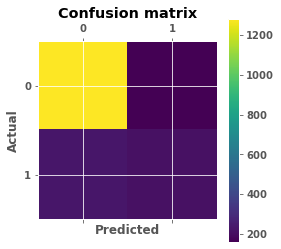

In [20]:
import pylab as plt
#fig = plt.figure(figsize=(15, 5)) # set the size of the container
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### let's use the scikit-learn classification_report module to evaluate the classifier accuracy

In [21]:
print(classification_report(vs_target_test,  knnpreds_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1443
           1       0.57      0.48      0.52       440

    accuracy                           0.79      1883
   macro avg       0.71      0.69      0.70      1883
weighted avg       0.78      0.79      0.79      1883



### Report the model accuracy for both the training and test sets.

#### we compute the average accuracy score across the test instances.

In [22]:
print(round(knnclf.score(vs_test_norm, vs_target_test), 2))

0.79


#### we compute the average accuracy score across the training instances.

In [23]:
print(round(knnclf.score(vs_train_norm, vs_target_train), 2))

0.94


#### 2.	Next, experiment with different values of K (say from 5 to 100) and the weight parameter (i.e., with or without distance weighting) to see if you can improve accuracy of the KNN classifier.

#### let's first define arrays to store training and test accuracies

In [24]:
# generate an array of k values from 5 too 100 with a step of 5
w_neighbors = np.arange(1, 100) 
print(w_neighbors)
vs_uniformTraining_accuracy = np.zeros(len(w_neighbors))
vs_uniformTesting_accuracy = np.zeros(len(w_neighbors))
vs_distanceTraining_accuracy = np.zeros(len(w_neighbors))
vs_distanceTesting_accuracy = np.zeros(len(w_neighbors))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [25]:
%%time
# loop through the ndarray
for num, k in enumerate(w_neighbors):
    # derive a classifier with K neighbors without distance weights
    knnclf_uni = neighbors.KNeighborsClassifier(n_neighbors = k)
    
    # derive a classifier with K neighbors weights = 'distance' 
    knnclf_dist = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    
    # lets fit both models by passing the training data set and target labels
    knnclf_uni.fit(vs_train_norm, vs_target_train)
    
    knnclf_dist.fit(vs_train_norm, vs_target_train)
    
    # lets derive the average accuracy on the training data set using the uniform classifier
    vs_uniformTraining_accuracy[num] = knnclf_uni.score(vs_train_norm, vs_target_train) 
    
    # lets derive the average accuracy on the testing data set using the uniform classifier.
    vs_uniformTesting_accuracy[num] = knnclf_uni.score(vs_test_norm, vs_target_test)
    
    # lets derive the average accuracy on the training data set using the KNN distance classifier
    vs_distanceTraining_accuracy[num] = knnclf_dist.score(vs_train_norm, vs_target_train) 
    
    # lets derive the average accuracy on the testing data set using the KNN distance classifier.
    vs_distanceTesting_accuracy[num] = knnclf_dist.score(vs_test_norm, vs_target_test)

Wall time: 4min 32s


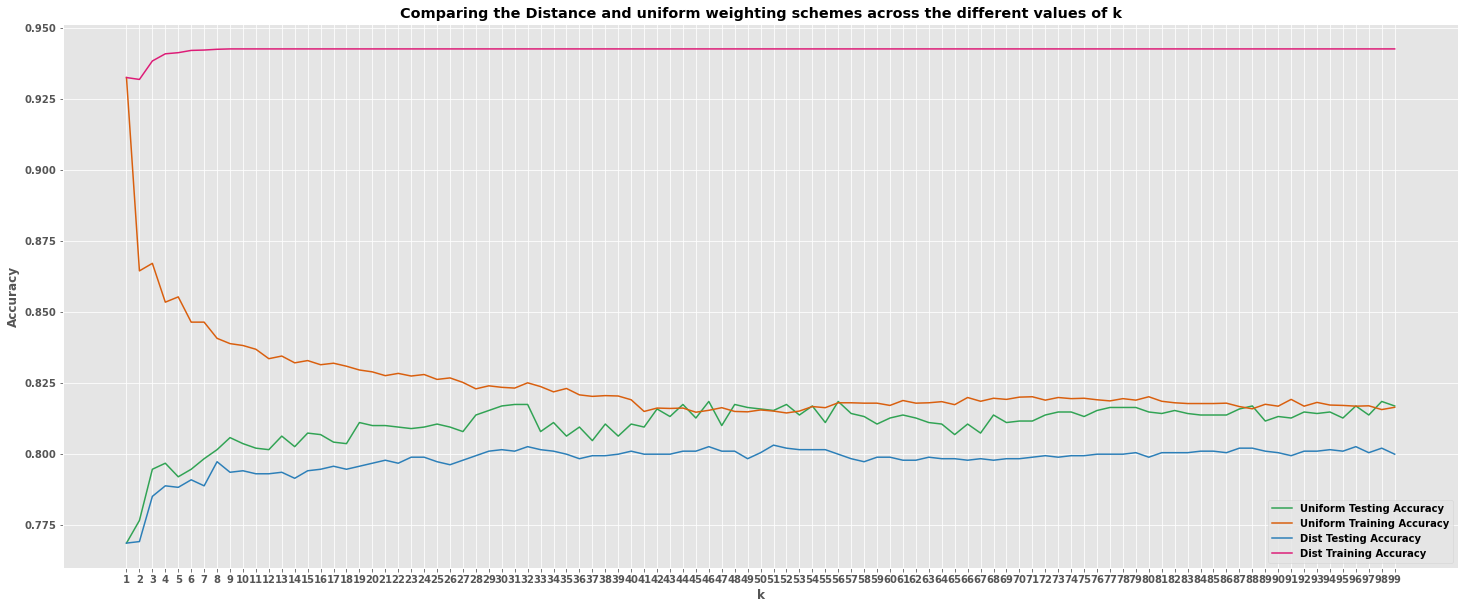

In [26]:
fig = plt.figure(figsize=(25, 10)) # set the size of the container
plt.plot(w_neighbors, vs_uniformTesting_accuracy,  label  = 'Uniform Testing Accuracy',   color = '#31a354')
plt.plot(w_neighbors, vs_uniformTraining_accuracy, label = 'Uniform Training Accuracy', color = '#d95f0e')

plt.plot(w_neighbors, vs_distanceTesting_accuracy,  label  = 'Dist Testing Accuracy',   color = '#2c7fb8')
plt.plot(w_neighbors, vs_distanceTraining_accuracy, label = 'Dist Training Accuracy', color = '#dd1c77')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparing the Distance and uniform weighting schemes across the different values of k')
plt.xticks(ticks = w_neighbors)
plt.show()

<p>Our best value of k will be at k = 51 and this is when we use the distance weighting.</p>

#### Train a new KNN classifier and report the accuracy of this classifier on both the training and test sets

In [27]:
#### training a new classifer
k = 51
knnclf_b = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')

# let's training the classifier with the training data and training target labels
knnclf_b.fit(vs_train_norm, vs_target_train)

# we call the predict function on the test instances to produce the predicted classes.
knnpreds_test = knnclf_b.predict(vs_test_norm)
print(knnpreds_test[0:5]) # this is what is predicted on the unseen data 

# we compute the average accuracy score across the test instances

print('The average accuracy score across the test instance when k = %s is %0.2f%%' %(k,  knnclf_b.score(vs_test_norm, vs_target_test) * 100))

# we compute the average accuracy score across the training instances
print('The average accuracy score across the training instance when k = %s is %0.2f%%' %(k, knnclf_b.score(vs_train_norm, vs_target_train)*100))


[1 1 0 1 0]
The average accuracy score across the test instance when k = 51 is 80.30%
The average accuracy score across the training instance when k = 51 is 94.26%


#### Confusion matrix

In [28]:
pd.crosstab(vs_target_test,  knnpreds_test, margins = True, colnames = ['Predicted'],  rownames = ['True'])

Predicted,0,1,All
True,,,
0,1295,148,1443
1,223,217,440
All,1518,365,1883


#### 3. Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. You should show the results in a single figure with two line plots for the test and training accuracy values (y-axis) and with values of K in the x-axis. What range of values of K represent overfitting? Briefly explain

In [29]:
# generate an array of k values from 5 too 100 with a step of 5
k_neighbors = np.arange(1, 100) 
print(k_neighbors)
vs_train_accuracy = np.zeros(len(k_neighbors))
vs_test_accuracy = np.zeros(len(k_neighbors))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [30]:
%%time
# loop through the ndarray
for num, k in enumerate(k_neighbors):
    # derive a classifier with K neighbors without distance weights
    knnclf = neighbors.KNeighborsClassifier(n_neighbors = k)
    
    # lets fit the model by passing the training data set and target labels
    knnclf.fit(vs_train_norm, vs_target_train)
    
    # lets derive the average accuracy on the training data set
    vs_train_accuracy[num] = knnclf.score(vs_train_norm, vs_target_train) 
    
    # lets derive the average accuracy on the testing data set.
    vs_test_accuracy[num] = knnclf.score(vs_test_norm, vs_target_test)

Wall time: 2min 41s


In [31]:
print(vs_train_accuracy[0:5]) # view the first 5 scores
print(vs_test_accuracy[0:5])

[0.93 0.86 0.87 0.85 0.86]
[0.77 0.78 0.79 0.8  0.79]


#### let's graph a single plot comparing training and testing accuracies across the different k values.


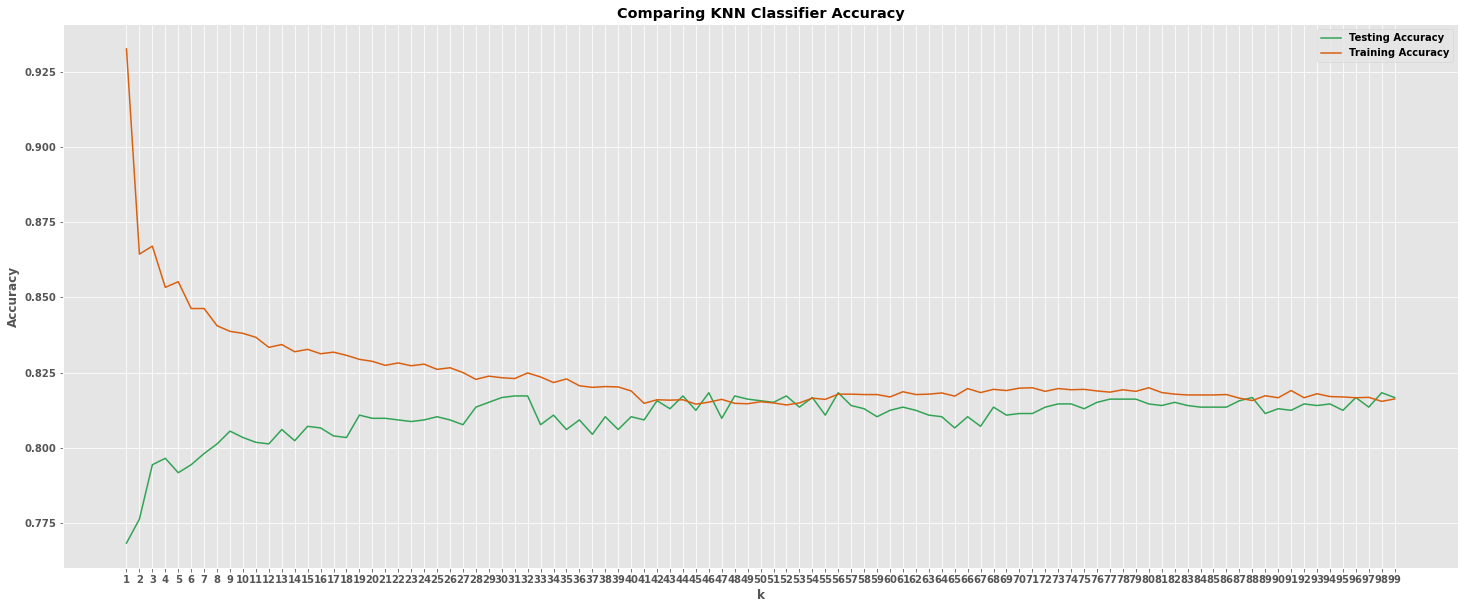

In [32]:
fig = plt.figure(figsize=(25, 10)) # set the size of the container
plt.plot(k_neighbors, vs_test_accuracy,  label  = 'Testing Accuracy',   color = '#31a354')
plt.plot(k_neighbors, vs_train_accuracy, label = 'Training Accuracy', color = '#d95f0e')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparing KNN Classifier Accuracy')
plt.xticks(ticks = k_neighbors)
plt.show()

####  The range from 1 to 51 doesn't include any reliable or stable patterns, which indicate over fitting and unstable patterns in the plot above are likely to be a result of not having enough data.We can hardly learn anything in general.

#### Use the best values of these parameters to train a new KNN and report the accuracy of this classifier on the training and test sets

In [33]:
# #### training a new classifer
# k = 41
# knnclf_b = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')

# # let's training the classifier with the training data and training target labels
# knnclf_b.fit(vs_train_norm, vs_target_train)

# # we call the predict function on the test instances to produce the predicted classes.
# knnpreds_test = knnclf_b.predict(vs_test_norm)
# print(knnpreds_test[0:5]) # this is what is predicted on the unseen data 

# # we compute the average accuracy score across the test instances

# print('The average accuracy score across the test instance when k = %s is %0.2f%%' %(k,  knnclf_b.score(vs_test_norm, vs_target_test) * 100))

# # we compute the average accuracy score across the training instances
# print('The average accuracy score across the training instance when k = %s is %0.2f%%' %(k, knnclf_b.score(vs_train_norm, vs_target_train)*100))


#### c. Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). 

##### let's build a decision tree classifier

In [34]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3) # minimum number in the parent before you decide that you can split further is 3, if it is less than 3 don't split. 
treeclf = treeclf.fit(vs_train, vs_target_train) # training your classifier

#### Note that trees will not be impacted by normalizing the data

#### let's predict on the entire test matrix

In [35]:
treePreds_test = treeclf.predict(vs_test)
print(treePreds_test)

[0 1 0 ... 0 0 1]


#### Generate the confusion matrix

In [36]:
treecm = confusion_matrix(vs_target_test, treePreds_test, labels = [0, 1])
print(treecm)

[[1256  187]
 [ 244  196]]


#### Also, we can use Panda's crosstab to generate a confusion matrix

In [37]:
pd.crosstab(vs_target_test,  treePreds_test, margins = True, colnames = ['Predicted'],  rownames = ['True'])

Predicted,0,1,All
True,,,
0,1256,187,1443
1,244,196,440
All,1500,383,1883


#### Generate a classification report

In [38]:
print(classification_report(vs_target_test, treePreds_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1443
           1       0.51      0.45      0.48       440

    accuracy                           0.77      1883
   macro avg       0.67      0.66      0.66      1883
weighted avg       0.76      0.77      0.77      1883



<p>Our numbers are generally low.</p>

#### compute the average score for the testing set

In [39]:
print(round(treeclf.score(vs_test, vs_target_test), 2))

0.77


#### compute the average score for the training set

In [40]:
print(round(treeclf.score(vs_train, vs_target_train), 2))

0.93


#### We learn that we have a big problem since there is a big drop between the average scores for the test and train. This means that we don't have enough data to learn something in general. Since we don't have enough data, our model is being overfitted which raises the need to tune it up. 

#### Next, we create another decision tree model (trained on the non-normalized training data) using "gini" index as the selection criteria, min_samples_split=10, and max_depth=4. 

In [41]:
treeclf_pruned = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=4)
treeclf_pruned = treeclf_pruned.fit(vs_train, vs_target_train) # training your classifier

#### let's again predict on the entire test matrix

In [42]:
treePreds_test = treeclf_pruned.predict(vs_test)
print(treePreds_test)

[0 0 0 ... 0 0 0]


#### show the accuracy results for both training and test sets

#### compute the average score for the testing set

In [43]:
print(round(treeclf_pruned.score(vs_test, vs_target_test), 2))

0.82


#### compute the average score for the training set

In [44]:
print(round(treeclf_pruned.score(vs_train, vs_target_train), 2))

0.82


#### Comparing the accuracy on training and testing to check whether we have over or underfitting, we notice how good our classifier is doing in training and testing.

#### We could also look at the confusion matrix

In [45]:
treecm = confusion_matrix(vs_target_test, treePreds_test, labels = [0, 1])
print(treecm)

[[1358   85]
 [ 260  180]]


In [46]:
pd.crosstab(vs_target_test,  treePreds_test, margins = True, colnames = ['Predicted'],  rownames = ['True'])

Predicted,0,1,All
True,,,
0,1358,85,1443
1,260,180,440
All,1618,265,1883


# Explain the above

#### Generate a visualized tree embedded in the Jupyter Notebook.

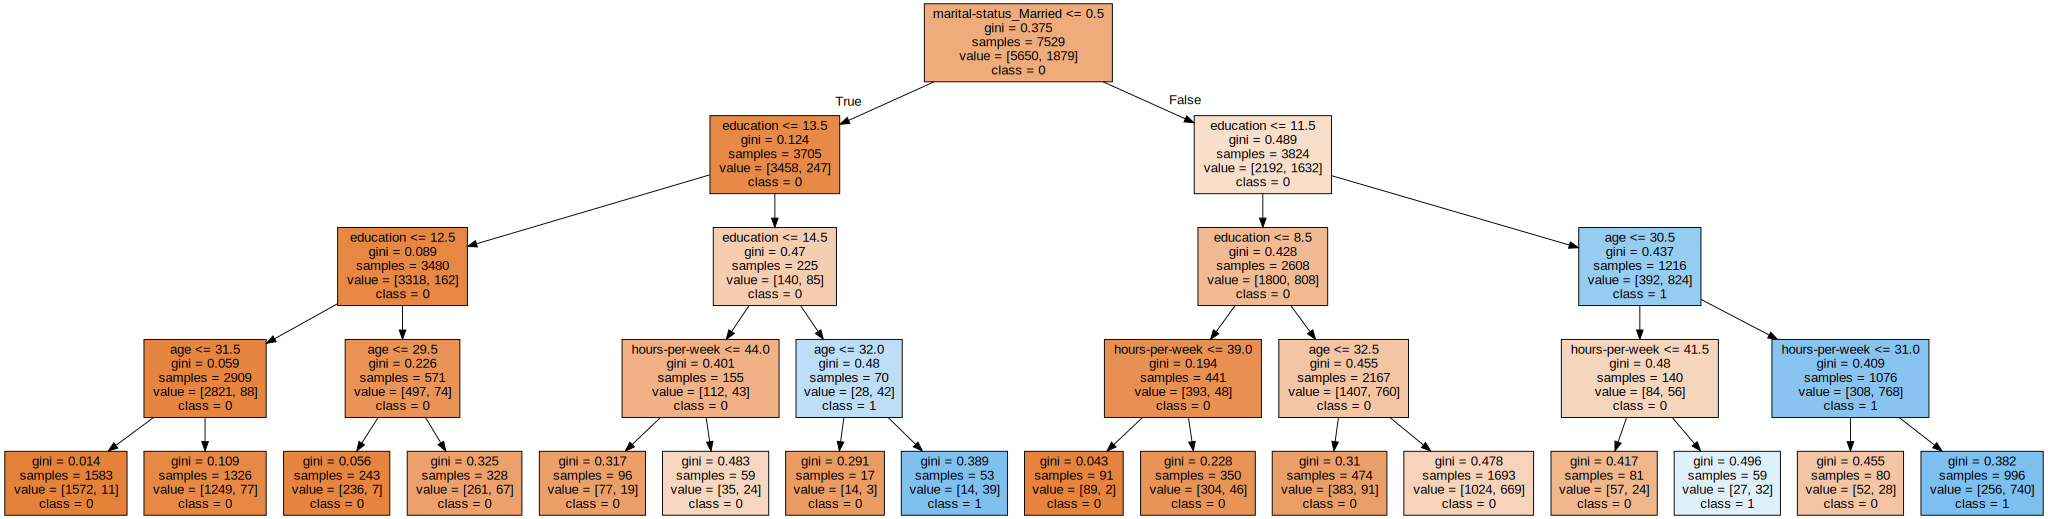

In [47]:
# the filled = true parameter value introduces color
export_graphviz(treeclf_pruned,out_file='tree.dot', feature_names=vs_train.columns, class_names=['0', '1'], filled=True) 

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## d. Using scikit-learn to build classifiers using Naive Bayes (Gaussian) and linear discriminat analysis (LDA)

#### First with Naive Bayes (Gaussian)

In [48]:
# derive a classifier assuming the assumption of the normal curve for everyone
nbclf = naive_bayes.GaussianNB() 

# fit the classifier
nbclf = nbclf.fit(vs_train, vs_target_train)

# score it on the training data set
print('Score on the Training instances: %0.2f' %(nbclf.score(vs_train, vs_target_train))) 

#score it on the testing instances
print('Score on the Test instances: %0.2f' %(nbclf.score(vs_test, vs_target_test)))

Score on the Training instances: 0.72
Score on the Test instances: 0.72


<p>The average accuracy scores for both the testing and training instances are equal, it might not be the best estimate, but atleast our model is 72% able to make any predictions without being overfitted.</p>

#### Next, we use a 10-fold cross validation, which splits the data set 10 times. We use cross validation scores in order to get a better estimate of the what the classifier does. 

In [49]:
cv_scores = model_selection.cross_val_score(nbclf, vs_adult_matrix_mod, vs_target, cv = 10)
print('The 10 fold cross validation scores: %s' %(cv_scores))

# let's derive the mean and standard deviation of the first 10 trials.
print('Overall Accuracy on the X-Val: %0.2f (+- %0.2f)' %(cv_scores.mean(), cv_scores.std() * 2))

The 10 fold cross validation scores: [0.73 0.7  0.73 0.71 0.73 0.71 0.71 0.72 0.73 0.71]
Overall Accuracy on the X-Val: 0.72 (+- 0.02)


<p>There is no gap between the score on the training and the score on the testing data sets, and these score estimates are equal to the overall accuracy. 0.72 is the overall accuracy and 0.02 is standard deviation. This means that our model performs well over the test data data and it hasn't overfitted the training data, and can be used for prediction. </p>

#### Using multinomial Naive Bayes

In [50]:
nbmclf = naive_bayes.MultinomialNB()

# fit the classifier
nbmclf = nbmclf.fit(vs_train, vs_target_train)

# score it on the training data set
print('Score on the Training instances: %0.2f' %(nbmclf.score(vs_train, vs_target_train))) 

#score it on the testing instances
print('Score on the Test instances: %0.2f' %(nbmclf.score(vs_test, vs_target_test)))

# Using a 10 fold cross validation to validate our scores
cv_scores = model_selection.cross_val_score(nbmclf, vs_adult_matrix_mod, vs_target, cv = 10)
print('The 10 fold cross validation scores: %s' %(cv_scores))

# let's derive the mean and standard deviation of the first 10 trials.
print('Overall Accuracy on the X-Val: %0.2f (+- %0.2f)' %(cv_scores.mean(), cv_scores.std() * 2))

Score on the Training instances: 0.74
Score on the Test instances: 0.74
The 10 fold cross validation scores: [0.75 0.74 0.75 0.75 0.74 0.75 0.74 0.76 0.74 0.75]
Overall Accuracy on the X-Val: 0.75 (+- 0.01)


<p>Using multinomial Naive Bayes, we get a slight increase in the average accuracy scores for both the training and testing data sets. The overall Accuracy score is 0.75 with a standard deviation of 0.01, which is significant between the two scores (training and testing) so, our model hasn't overfitted the training data.</p>

#### Linear Discriminant Analysis (LDA). 

In [51]:
ldclf = LinearDiscriminantAnalysis()

# fit the classifier
ldclf = ldclf.fit(vs_train, vs_target_train)

#score it on the testing instances
print('Score on the Test instances: %0.2f' %(ldclf.score(vs_test, vs_target_test)))

# score it on the training data set
print ('Score on the Training instances: %0.2f' %(ldclf.score(vs_train, vs_target_train)))



Score on the Test instances: 0.81
Score on the Training instances: 0.81


#### We apply a 10-fold cross validation, which splits the data set 10 times in order to get a better estimate of the what the classifier does.

In [52]:
cv_scores = model_selection.cross_val_score(ldclf, vs_adult_matrix_mod, vs_target, cv = 10)
print('The 10 fold cross validation scores: %s' %(cv_scores))

# let's derive the mean and standard deviation of the first 10 trials.
print('Overall Accuracy on the X-Val: %0.2f (+- %0.2f)' %(cv_scores.mean(), cv_scores.std() * 2))

The 10 fold cross validation scores: [0.81 0.81 0.79 0.82 0.81 0.79 0.8  0.81 0.82 0.82]
Overall Accuracy on the X-Val: 0.81 (+- 0.02)


<p>Using <strong>LDA</strong> gives us better average accuracy scores on both the training and testing instances. There is no gap between the score on training and the score on testing. 0.81 is the average score and 0.02 is the standard deivation, which is significant between the two scores and this tells us that our model performs well over the test data with 81 percent accuracy. Also, the model doesn't overfit the training data.</p>